## Gas Sensor Array Drift 

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import tempfile
import os

C:\Users\User1\AppData\Local\Temp\ipykernel_8988\2858250728.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Reading 

In [43]:
list_features = []
list_targets = []

# Define a function to handle reading and cleaning the data
def read_and_clean_svmlight(file_path):
    with open(file_path, 'r') as file:
        data = file.read().replace(';', '')  # Remove semicolons

    with tempfile.NamedTemporaryFile(delete=False, mode='w') as tmp_file:
        tmp_file.write(data)
        tmp_file_path = tmp_file.name
    
    X, y = load_svmlight_file(tmp_file_path, dtype=np.float64, zero_based=False)
    X = pd.DataFrame(X.toarray())
    y = pd.Series(y)
    
    os.remove(tmp_file_path)
    
    # Extract first digit from each value in y
    y = y.apply(lambda x: int(str(x)[0]))  # Convert to string, take first character, and convert back to int
    
    return X, y

# Loop through each batch file from batch1.dat to batch10.dat
for i in range(1, 11):
    X, y = read_and_clean_svmlight(f'../Dataset/New_Data/batch{i}.dat')
    list_features.append(X)
    list_targets.append(y)

# Concatenate all DataFrames and Series
X = pd.concat(list_features, ignore_index=True)
y = pd.concat(list_targets, ignore_index=True)

In [44]:
print(X.shape)
X.head()

(13910, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,-4.847512,15326.6914,1.768526,...,-1.071137,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529
1,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,-7.518333,23855.7812,2.164706,...,-1.530519,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
2,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,...,-2.384784,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
3,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,...,-2.607199,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
4,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,...,-3.594763,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756


## Min-Max data scaling (-1 to 1)

In [45]:
scaler = MinMaxScaler(feature_range=(-1, 1))
cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

In [46]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.905872,-0.997343,-0.971612,-0.975257,-0.984879,0.958387,0.795490,0.865034,-0.878662,-0.998106,...,0.757627,0.941052,-0.784112,-0.854664,-0.967450,-0.995176,-0.986399,0.964157,0.763942,0.947373
1,-0.874435,-0.996351,-0.935227,-0.942549,-0.984585,0.928190,0.775693,0.862033,-0.845751,-0.997632,...,0.746861,0.945275,-0.762410,-0.840881,-0.939320,-0.989122,-0.981219,0.941361,0.751117,0.951699
2,-0.828754,-0.994975,-0.901866,-0.907260,-0.976629,0.883323,0.746385,0.856738,-0.792863,-0.996824,...,0.726840,0.941742,-0.729302,-0.791153,-0.912999,-0.983409,-0.970060,0.911878,0.730715,0.948836
3,-0.826652,-0.994980,-0.854993,-0.856440,-0.919666,0.880565,0.744694,0.857085,-0.789712,-0.996811,...,0.721628,0.940969,-0.724868,-0.786506,-0.877101,-0.976055,-0.959714,0.905411,0.726073,0.948164
4,-0.782066,-0.993870,-0.862880,-0.861308,-0.964463,0.831314,0.713546,0.852045,-0.737248,-0.996058,...,0.698484,0.936418,-0.686562,-0.711911,-0.876364,-0.974309,-0.956094,0.872440,0.702171,0.940519


In [47]:
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

## Feature Selection Using XGBoost

In [48]:
! pip install xgboost




[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [50]:
X_train.shape

(11128, 128)

In [51]:
y_train.shape

(11128,)

In [53]:
y_train_adj = y_train - 1
y_test_adj = y_test - 1

[0]	validation_0-mlogloss:1.51462	validation_1-mlogloss:1.65047
[73]	validation_0-mlogloss:0.00392	validation_1-mlogloss:1.29744
Run time [s] for XGBClassifier model is:  12.393070220947266  Seconds
Test Accuracy: 0.660


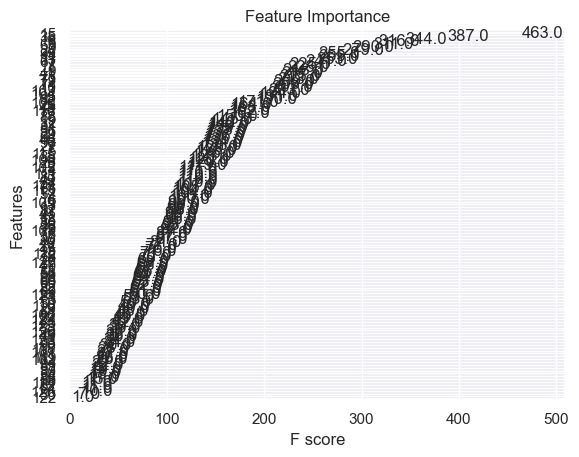

In [55]:
from sklearn.metrics import accuracy_score
import time
# Start time measurement
start = time.time()

# Initialize the XGBClassifier
clf = xgb.XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    n_estimators=500,
    objective='multi:softprob',  # Appropriate objective for multi-class classification
    max_depth=10,  # Adjusted max_depth for efficiency
    learning_rate=0.1, 
    early_stopping_rounds=50,
    eval_metric='mlogloss'  # Multi-class log-loss
)

# Fit the model
clf.fit(X_train, y_train_adj,
        eval_set=[(X_train, y_train_adj), (X_test, y_test_adj)],
        verbose=100)

# End time measurement
end = time.time()
print("Run time [s] for XGBClassifier model is: ", end-start, " Seconds")

# Evaluate the model on test data
y_pred = clf.predict(X_test)
y_pred_adj = y_pred + 1  # Adjust predictions back to original class labels

test_accuracy = accuracy_score(y_test, y_pred_adj)
print(f"Test Accuracy: {test_accuracy:.3f}")



In [ ]:
# Evaluate the model on test data
y_pred = clf.predict(X_test)
y_pred_adj = y_pred + 1  # Adjust predictions back to original class labels

In [56]:

y_pred1 = clf.predict(X_test)
predictions1 = np.round(y_pred1+1).astype(int)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_classification_errors(y_true, y_pred):
    # Calculate Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate Precision (macro-averaged)
    precision = precision_score(y_true, y_pred, average='macro')
    
    # Calculate Recall (macro-averaged)
    recall = recall_score(y_true, y_pred, average='macro')
    
    # Calculate F1 Score (macro-averaged)
    f1 = f1_score(y_true, y_pred, average='macro')
    
    # Calculate Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Print classification metrics
    print("Accuracy:", accuracy)
    print("Precision (macro):", precision)
    print("Recall (macro):", recall)
    print("F1 Score (macro):", f1)
    print("Confusion Matrix:\n", cm)
    
    return accuracy, precision, recall, f1, cm

In [60]:
accuracy, precision, recall, f1, cm = calculate_classification_errors(y_test, y_pred1)




Accuracy: 0.01833213515456506
Precision (macro): 0.01572779568327746
Recall (macro): 0.012346938775510203
F1 Score (macro): 0.013757065882680069
Confusion Matrix:
 [[  0   0   0   0   0   0   0]
 [232   0   0 246  75  47   0]
 [  0 333   0  27  11   0   0]
 [  4  73 340   2   0   1   0]
 [  0   7   0 322   0  91   0]
 [ 41 146  23   1 340  49   0]
 [  0   0   1  98   3 269   0]]


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
def plot_feature_importance(model, top_n=10):
    """
    Plot the feature importance of a trained XGBoost model.

    Args:
        model (xgb.XGBRegressor): Trained XGBoost Regressor model.
        top_n (int): Number of top features to plot.

    Returns:
        None
    """
    feat_importances = pd.DataFrame(data=model.feature_importances_,
                                    index=model.feature_names_in_,
                                    columns=['importance'])
    # Sort feature importances and select top_n
    feat_importances = feat_importances.sort_values(by='importance', ascending=False).head(top_n)
    
    # Plot only the top_n features
    feat_importances.sort_values('importance').plot(kind='barh', title='Feature Importance')
    plt.show()

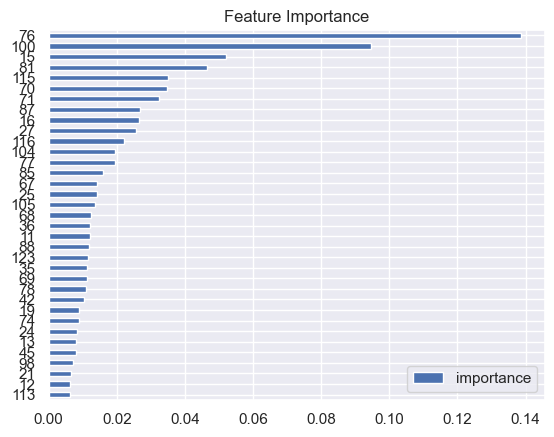

In [58]:
plot_feature_importance(clf,35)

In [62]:
from sklearn.feature_selection import SelectFromModel

# Sort feature importances
thresholds = [0.01]
for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # Train model
    selection_model =  XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    
    # Get selected feature indices
    selected_feature_indices = selection.get_support(indices=True)
    
    # Get selected feature names
    selected_feature_names = X_train.columns[selected_feature_indices]
    
    # Evaluate model
    select_X_test = selection.transform(X_test)
    y_pred1 = selection_model.predict(select_X_test)
    predictions1 = np.round(y_pred1)
    
    # Print selected feature names
    for feature in selected_feature_names:
        print(feature)
    


11
15
16
25
27
35
36
42
67
68
69
70
71
76
77
78
81
85
87
88
100
104
105
115
116
123


In [63]:
Final_Features = ['11',
'15',
'16',
'25',
'27',
'35',
'36',
'42',
'67',
'68',
'69',
'70',
'71',
'76',
'77',
'78',
'81',
'85',
'87',
'88',
'100',
'104',
'105',
'115',
'116',
'123']

In [64]:
X.columns = X.columns.astype(str)

# Then you don't need to convert Final_Features
# Just select the columns
X = X[Final_Features]

In [65]:
X.shape

(13910, 26)

In [66]:
y.name = 'target'
dataset = pd.concat([X, y], axis=1)
dataset.to_csv('../Dataset/dataset_new.csv', index=False)

In [68]:
dataset.shape

(13910, 27)

In [69]:
dataset.head(1)

,11,15,16,25,27,35,36,42,67,68,...,85,87,88,100,104,105,115,116,123,target
0,-0.983235,0.880771,-0.465786,-0.965757,-0.998345,-0.996478,-0.998516,-0.986391,-0.970262,-0.968339,...,0.961107,0.958817,-0.727604,-0.993608,-0.743961,-0.830349,-0.983651,-0.989825,-0.995176,1


In [70]:
# Check total number of gases
dataset.target.nunique()

6

In [72]:
import seaborn as sns

sns.countplot(dataset.target)
sns.set(style="darkgrid")
plt.title('Gas Count')
plt.show()

KeyboardInterrupt: 

C:\Users\User1\AppData\Local\Temp\ipykernel_8988\60363635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.target)


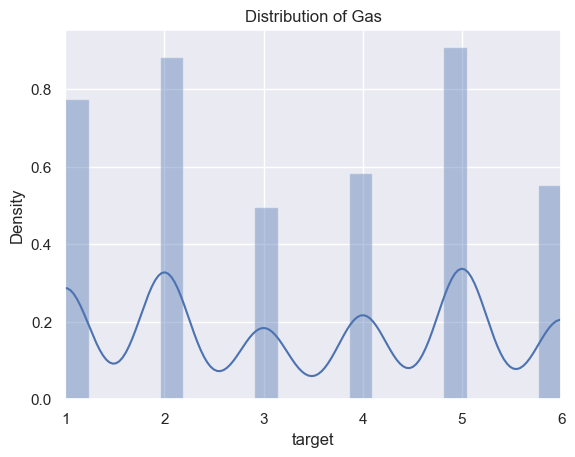

In [38]:
sns.distplot(dataset.target)
plt.xlim(1, 6)
plt.title('Distribution of Gas')
plt.show()